In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('./files/modelZoo.xlsx')
df

,Model name,Speed (ms),COCO mAP,Outputs,COCO mAP.1,Outputs.1
0,CenterNet HourGlass104 512x512,70,41.9,Boxes,NaN,NaN
1,CenterNet HourGlass104 Keypoints 512x512,76,40.0,Boxes,61.4,Keypoints
2,CenterNet HourGlass104 1024x1024,197,44.5,Boxes,NaN,NaN
3,CenterNet HourGlass104 Keypoints 1024x1024,211,42.8,Boxes,64.5,Keypoints
4,CenterNet Resnet50 V1 FPN 512x512,27,31.2,Boxes,NaN,NaN
5,CenterNet Resnet50 V1 FPN Keypoints 512x512,30,29.3,Boxes,50.7,Keypoints
6,CenterNet Resnet101 V1 FPN 512x512,34,34.2,Boxes,NaN,NaN
7,CenterNet Resnet50 V2 512x512,27,29.5,Boxes,NaN,NaN
8,CenterNet Resnet50 V2 Keypoints 512x512,30,27.6,Boxes,48.2,Keypoints
9,CenterNet MobileNetV2 FPN 512x512,6,23.4,Boxes,NaN,NaN


In [3]:
df.columns

Index(['Model name', 'Speed (ms)', 'COCO mAP', 'Outputs', 'COCO mAP.1',
       'Outputs.1'],
      dtype='object')

In [4]:
df.rename(columns={"COCO mAP": "COCO-mAP-Boxes", "Outputs": "Boxes", "COCO mAP.1":"COCO-mAP-KeyPoints", "Outputs.1": "KeyPoints"}, inplace=True)
# df.fillna(0, inplace=True)
df.head()

,Model name,Speed (ms),COCO-mAP-Boxes,Boxes,COCO-mAP-KeyPoints,KeyPoints
0,CenterNet HourGlass104 512x512,70,41.9,Boxes,NaN,NaN
1,CenterNet HourGlass104 Keypoints 512x512,76,40.0,Boxes,61.4,Keypoints
2,CenterNet HourGlass104 1024x1024,197,44.5,Boxes,NaN,NaN
3,CenterNet HourGlass104 Keypoints 1024x1024,211,42.8,Boxes,64.5,Keypoints
4,CenterNet Resnet50 V1 FPN 512x512,27,31.2,Boxes,NaN,NaN


In [5]:
df['Boxes'] = df['Boxes'].replace('Boxes', 1)
df.head()

,Model name,Speed (ms),COCO-mAP-Boxes,Boxes,COCO-mAP-KeyPoints,KeyPoints
0,CenterNet HourGlass104 512x512,70,41.9,1.0,NaN,NaN
1,CenterNet HourGlass104 Keypoints 512x512,76,40.0,1.0,61.4,Keypoints
2,CenterNet HourGlass104 1024x1024,197,44.5,1.0,NaN,NaN
3,CenterNet HourGlass104 Keypoints 1024x1024,211,42.8,1.0,64.5,Keypoints
4,CenterNet Resnet50 V1 FPN 512x512,27,31.2,1.0,NaN,NaN


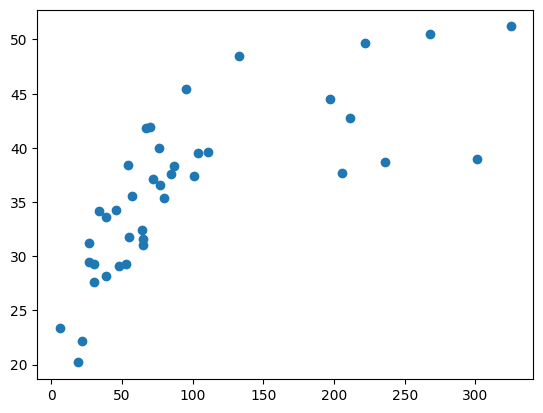

In [6]:
plt.scatter(df["Speed (ms)"], df["COCO-mAP-Boxes"])
plt.show()

In [7]:
import plotly.express as px

In [8]:
fig = px.scatter(df, x="Speed (ms)", y="COCO-mAP-Boxes", text="Model name", width=1200, height=800,
                 labels={
                     "Speed (ms)": "Speed (ms)",
                     "COCO-mAP-Boxes": "COCO-mAP",
                 })
# fig = px.scatter(df, x="Speed (ms)", y="COCO-mAP-KeyPoints", text="Model name", width=1200, height=800,
#                  labels={
#                      "Speed (ms)": "Speed (ms)",
#                      "COCO-mAP-KeyPoints": "COCO-mAP",
#                  })
fig.update_traces(textposition='top center')
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=10,  # Set the font size here
    ))
fig.update_layout(
    title=dict(
            text='Speed and mAP Tradoff', 
            x=0.5,
            font_size=20,
    ))
fig.update_layout(
    xaxis=dict(
        tickfont=dict(
            size=16,
        ),
        title_font=dict(
            size=20,
        ),
    ),
)
fig.update_layout(
    yaxis=dict(
        tickfont=dict(
            size=16,
        ),
        title_font=dict(
            size=20,
        ),
    ),
)
# Display plot
fig.show()

In [9]:
import plotly.graph_objs as go  # Building blocks of Plotly plots
# Traces
trace0 = dict(
    type='scatter', 
    x=df["Speed (ms)"], y=df["COCO-mAP-Boxes"], 
    mode = 'markers',
    name='Boxes',
    text=df["Model name"],
    textposition='top center',
    marker=dict(size=8, opacity=0.8), # Adjust marker size and opacity
)

trace1 = dict(
    type='scatter', 
    x=df["Speed (ms)"], y=df["COCO-mAP-KeyPoints"],
    mode = 'markers',
    name='KeyPoints',
    text=df["Model name"],
    textposition='top center',
    marker=dict(size=8, opacity=0.8), # Adjust marker size and opacity
)

# Layout
layout = dict(
    title='Speed and mAP Tradoff',
    title_x=0.5,
    xaxis=dict(title='COCO-mAP', range=[0,350]),
    yaxis=dict(title='Speed (ms)', range=[10,60]),
    
)
# Figure
fig = go.Figure(data=[trace0, trace1],layout=layout,) 
fig.update_layout(width=1200)
# Display the result within the notebook:
config= {'displaylogo': False}
fig.show(config=config)